## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Predicting a numeric variable is regression, and prediciting a categorical outcome is classification.
2. In order to more broadly measure the performance of a classifier, you can make a confusion table by cross-tabulate the predicted and true values, and then look for patterns in the successes and failures.
3. SSE quantifies how far the predicted values are from the true values.
4. Underfitting occurs when your model is too simple to reliably explain the phenomenon you are interested in, and overfitting occurs when your model is too complex to reliably explain the phenomenon you are interested in. So underfitting is when your k is too small and overfitting is when k is too big.
5. When you split the model into two sets, it allows you to look at overfitting and helps you select the value of k with the lowest SSE.
6. Predicting labels is simpler to interpret, and prediciting probabilities is harder. However, prediciting probabilities shows more information about uncertainty.



**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/USA_cars_datasets.csv")
df = df[['price', 'year', 'mileage']]

df.isna().sum()
df.head()
df.shape

(2499, 3)

In [3]:
def minmax(x):
    return (x - x.min()) / (x.max() - x.min())

df['year_norm'] = minmax(df['year'])
df['mileage_norm'] = minmax(df['mileage'])

In [4]:
from sklearn.model_selection import train_test_split

X = df[['year_norm', 'mileage_norm']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

k=3, MSE=148065935.52


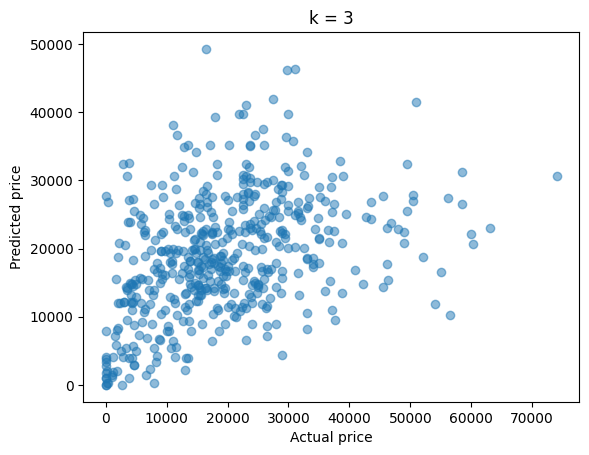

k=10, MSE=117399126.11


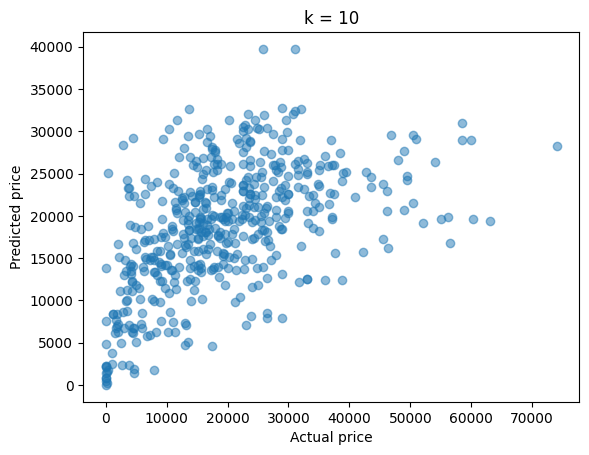

k=25, MSE=112576160.82


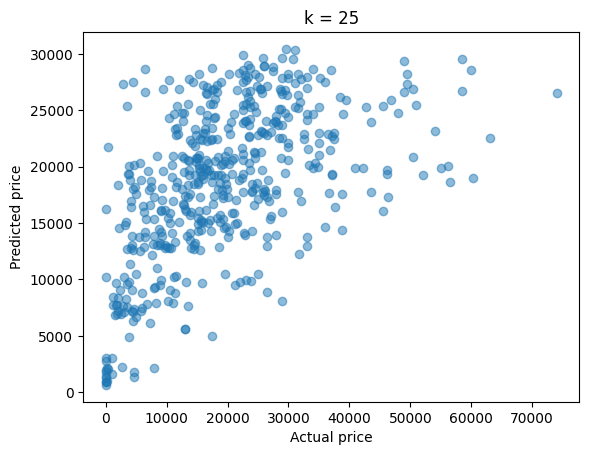

k=50, MSE=110202549.30


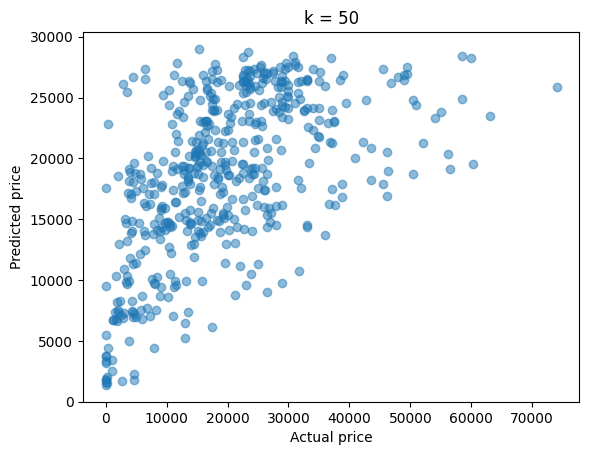

k=100, MSE=112253932.82


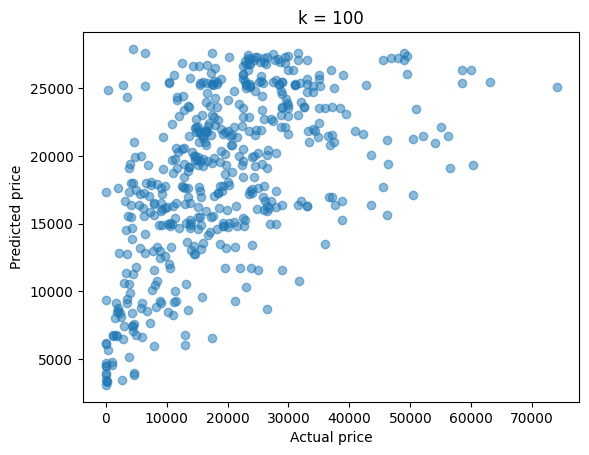

k=300, MSE=114496301.83


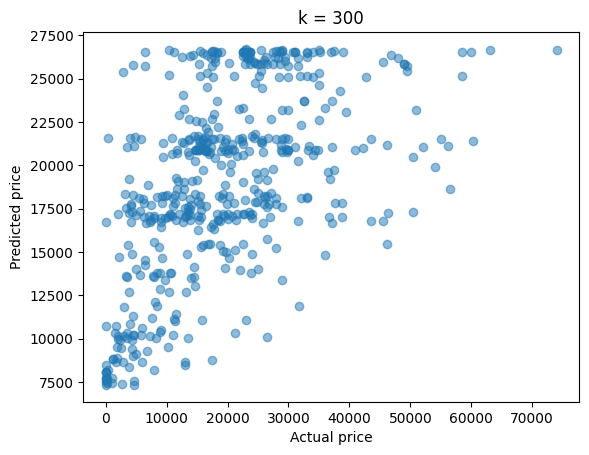

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ks = [3, 10, 25, 50, 100, 300]

for k in ks:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    print(f"k={k}, MSE={mse:.2f}")

    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual price")
    plt.ylabel("Predicted price")
    plt.title(f"k = {k}")
    plt.show()

k = 50 is the most optimal. As the K got larger, the graphs started to form lines at predicted price values. This is the model underfitting. For smaller values of k, the graph is more spread out and random, it is overfitting.

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [9]:
animals = pd.read_csv("/content/zoo.csv")

animals.groupby('class')['animal'].apply(list)
animals['class'].value_counts()
animals.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


All of the class labels have 101. The largest mean is "breathes".

In [10]:
X = animals.drop(columns=['animal', 'class'])
y = animals['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for k in range(1, 15):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(k, accuracy_score(y_test, preds))

1 0.9607843137254902
2 0.9607843137254902
3 0.9607843137254902
4 0.8823529411764706
5 0.8431372549019608
6 0.8235294117647058
7 0.8235294117647058
8 0.8235294117647058
9 0.8235294117647058
10 0.8235294117647058
11 0.8235294117647058
12 0.8235294117647058
13 0.8235294117647058
14 0.7647058823529411


I am choosing 1 for the k value. This has the highest accuracy score.

In [12]:
from sklearn.metrics import confusion_matrix

best_model = KNeighborsClassifier(n_neighbors=3)
best_model.fit(X_train, y_train)

preds = best_model.predict(X_test)
confusion_matrix(y_test, preds)

array([[21,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  5]])

The first two classes were perfectly predicted. The 3rd class was predicted completely wrong. Class 4-7 were also predicted perfectly.

In [13]:
features = ['milk', 'aquatic', 'airborne']

X_small = animals[features]

X_train, X_test, y_train, y_test = train_test_split(
    X_small, y, test_size=0.5, random_state=42, stratify=y
)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

confusion_matrix(y_test, model.predict(X_test))

array([[19,  2,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  4,  0,  0,  0]])

In [14]:
probs = model.predict_proba(X_test.values)
probs

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 0.33333333],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.66666667, 0.        ,
        0.        , 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0. 

Since every class has a probabilty, the fact that class 3 was predicted wrong is because it does not receive a majority, not because there is missing data. There is just overlap between some of the classes.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [15]:
import numpy as np

def gaussian(z):
    return (1 / np.sqrt(2*np.pi)) * np.exp(-0.5 * z**2)

def uniform(z):
    return np.where(np.abs(z) <= 1, 0.5, 0)

def epanechnikov(z):
    return np.where(np.abs(z) <= 1, 0.75 * (1 - z**2), 0)

In [16]:
def silverman(x):
    return 1.06 * np.std(x) * len(x) ** (-1/5)

In [49]:
def kde(x, grid, kernel='gaussian', h=None):
    x = np.asarray(x)
    if h is None:
        h = 1.15 * silverman(x)

    kernels = {
        'gaussian': gaussian,
        'uniform': uniform,
        'epanechnikov': epanechnikov
    }

    kfun = kernels[kernel]

    z = (grid[:, np.newaxis] - x) / h


    return np.mean(kfun(z), axis=1) / h

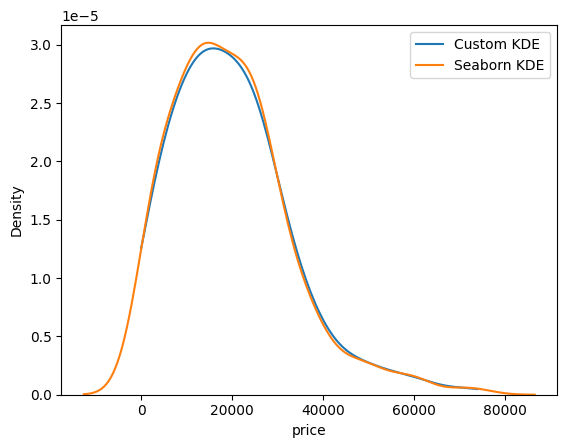

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df['price'].sample(300)

grid = np.linspace(data.min(), data.max(), 150)
density = kde(data, grid)

plt.plot(grid, density, label="Custom KDE")
sns.kdeplot(data, label="Seaborn KDE")
plt.legend()
plt.show()